In [4]:
import os
import time
import numpy as np
import pandas as pd
import joblib
import kagglehub

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import tree


In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

path = kagglehub.dataset_download("rakeshkapilavai/extrovert-vs-introvert-behavior-data")
orig = pd.read_csv(os.path.join(path, 'personality_dataset.csv'))


100%|██████████| 30.5k/30.5k [00:00<00:00, 1.74MB/s]

Extracting files...


In [6]:
# Drop unnecessary columns and align both datasets
train_data = train.drop(columns=['id'])
orig_data = orig.copy()

# Concatenate the two datasets
data2 = pd.concat([train_data, orig_data], axis=0).reset_index(drop=True)


In [7]:
# Head and tail
print("Head:\n", data2.head(), "\n")
print("Tail:\n", data2.tail(), "\n")

# Shape and info
print("Shape:", data2.shape, "\n")
print("Info:")
data2.info()
print("\n")

# Missing values
print("null Values:\n", data2.isnull().sum(), "\n")

# Unique values per column
print("Unique Values:")
for col in data2.columns:
    print(f"{col}: {data2[col].nunique()}")
print("\n")

# Duplicate check
duplicates = data2.duplicated()
print("Number of duplicate rows:", duplicates.sum())


Head:
    Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               0.0         No                      6.0            4.0   
1               1.0         No                      7.0            3.0   
2               6.0        Yes                      1.0            0.0   
3               3.0         No                      7.0            3.0   
4               1.0         No                      4.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 15.0             5.0   Extrovert  
1                        No                 10.0             8.0   Extrovert  
2                       NaN                  3.0             0.0   Introvert  
3                        No                 11.0             5.0   Extrovert  
4                        No                 13.0             NaN   Extrovert   

Tail:
        Time_spent_Alone Stage_fear  Social_event_attendance  Goin

In [8]:
# Drop missing values
data2 = data2.dropna().reset_index(drop=True)

# Drop duplicate rows
data2 = data2.drop_duplicates().reset_index(drop=True)

# Confirm the result
print("New shape after cleaning:", data2.shape)
print("Missing values remaining:\n", data2.isnull().sum())
print("Duplicates remaining:", data2.duplicated().sum())


New shape after cleaning: (12287, 8)
Missing values remaining:
 Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64
Duplicates remaining: 0


In [9]:
# Summary statistics
print("Describe:\n", data2.describe(include='all'), "\n")

# Data types summary
print("Data Types:\n", data2.dtypes.value_counts(), "\n")
print("Each column's dtype:\n", data2.dtypes)


Describe:
         Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
count       12287.000000      12287             12287.000000   12287.000000   
unique               NaN          2                      NaN            NaN   
top                  NaN         No                      NaN            NaN   
freq                 NaN       9661                      NaN            NaN   
mean            2.898348        NaN                 5.433385       4.240254   
std             2.849043        NaN                 2.707500       2.004325   
min             0.000000        NaN                 0.000000       0.000000   
25%             1.000000        NaN                 4.000000       3.000000   
50%             2.000000        NaN                 6.000000       4.000000   
75%             4.000000        NaN                 8.000000       6.000000   
max            11.000000        NaN                10.000000       7.000000   

       Drained_after_socializing  Friend

In [10]:
for col in data2.columns:
    print(f"\n--- {col} ---")
    print(data2[col].value_counts())



--- Time_spent_Alone ---
Time_spent_Alone
2.0     2331
0.0     2311
3.0     2254
1.0     2233
4.0      781
5.0      367
9.0      353
10.0     348
6.0      345
7.0      334
8.0      333
11.0     297
Name: count, dtype: int64

--- Stage_fear ---
Stage_fear
No     9661
Yes    2626
Name: count, dtype: int64

--- Social_event_attendance ---
Social_event_attendance
4.0     1501
7.0     1478
9.0     1467
5.0     1466
6.0     1456
8.0     1454
3.0     1114
2.0      663
0.0      636
1.0      631
10.0     421
Name: count, dtype: int64

--- Going_outside ---
Going_outside
3.0    2148
6.0    2067
4.0    2039
5.0    2039
7.0    1823
0.0     760
2.0     731
1.0     680
Name: count, dtype: int64

--- Drained_after_socializing ---
Drained_after_socializing
No     9660
Yes    2627
Name: count, dtype: int64

--- Friends_circle_size ---
Friends_circle_size
5.0     1139
4.0      925
10.0     897
8.0      885
12.0     868
14.0     859
11.0     857
13.0     854
6.0      851
9.0      848
7.0      834
15.0  

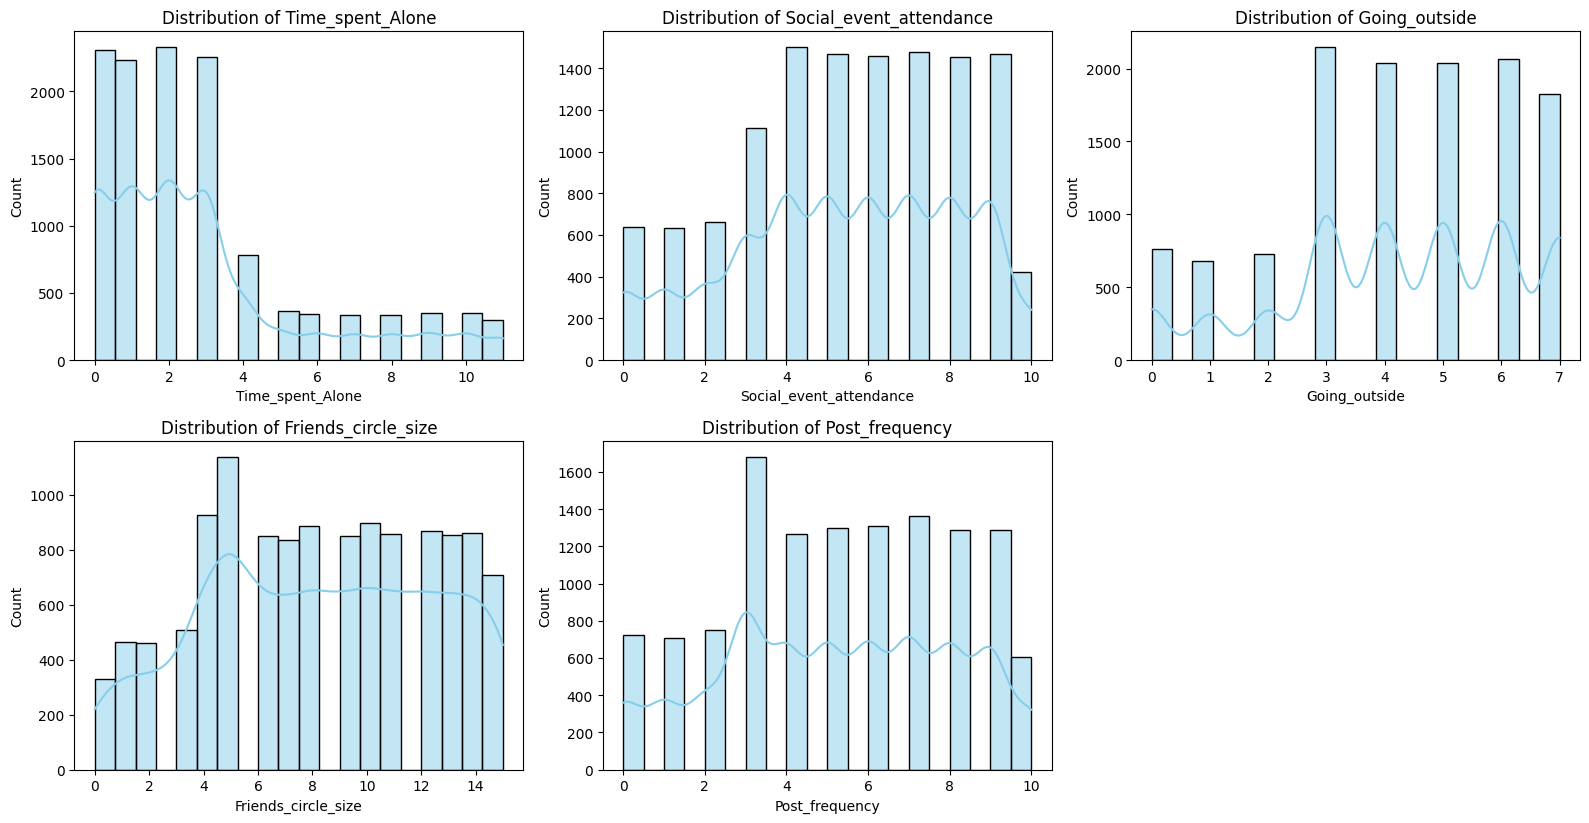

In [11]:


numeric_cols = data2.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data2[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()


/tmp/ipython-input-12-1683488699.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personality', y=col, data=data2, palette='coolwarm')
/tmp/ipython-input-12-1683488699.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personality', y=col, data=data2, palette='coolwarm')
/tmp/ipython-input-12-1683488699.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personality', y=col, data=data2, palette='coolwarm')
/tmp/ipython-input-12-1683488699.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

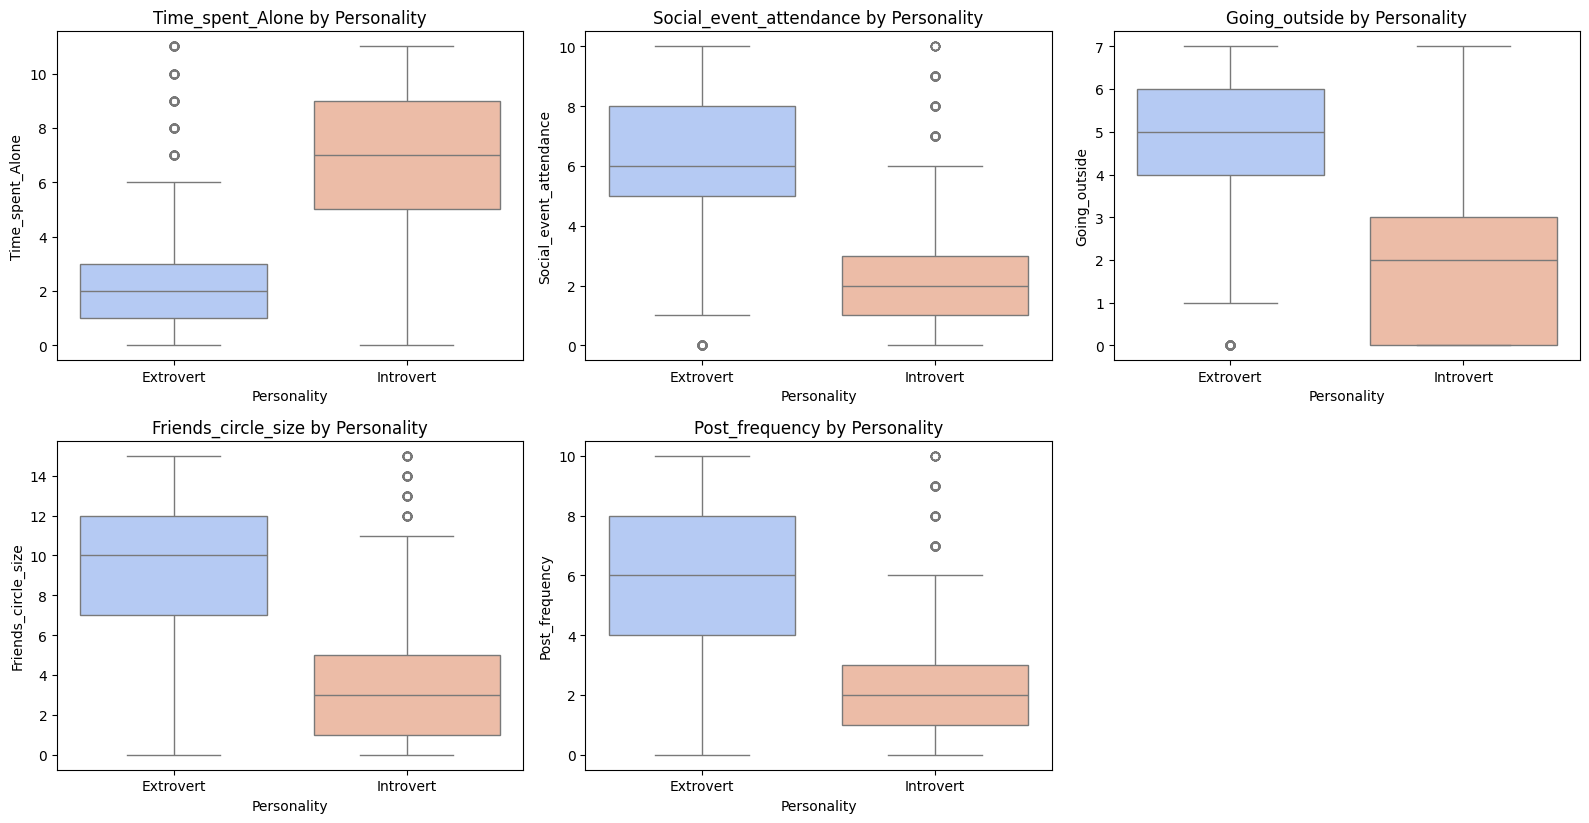

In [12]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Personality', y=col, data=data2, palette='coolwarm')
    plt.title(f'{col} by Personality')
    plt.tight_layout()
plt.show()


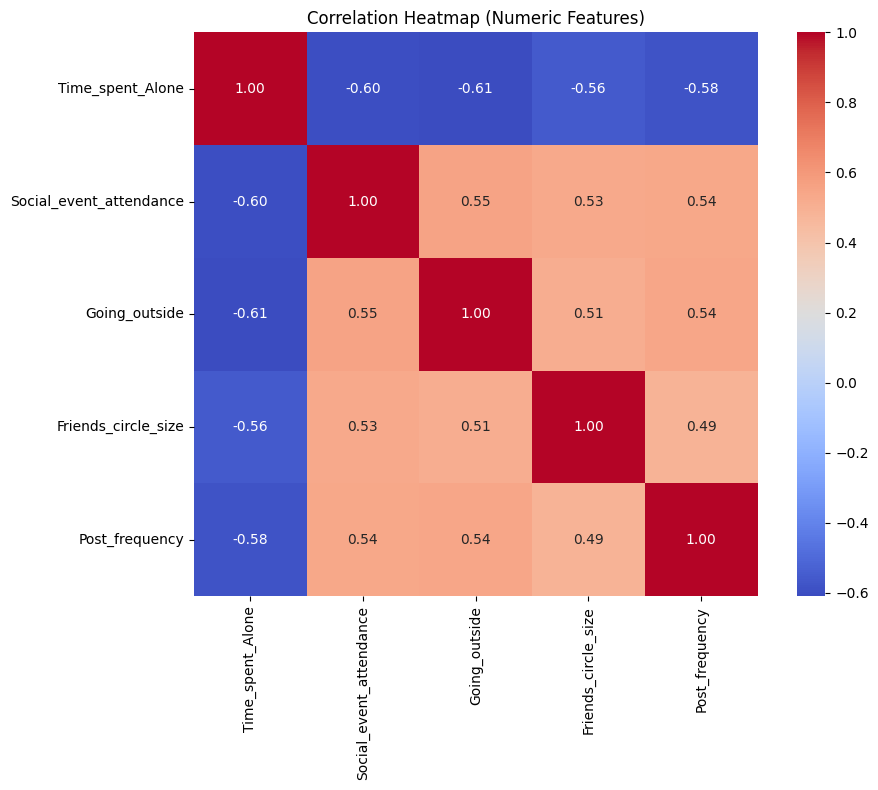

In [13]:
plt.figure(figsize=(10, 8))
corr = data2.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()


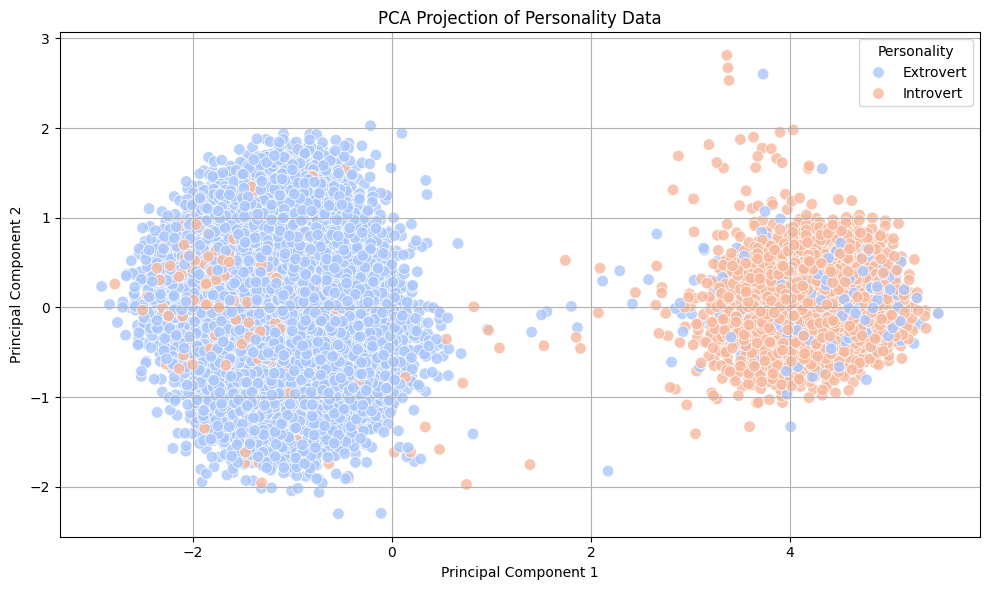

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Copy of data2 for safe PCA processing
data3 = data2.copy()

# Encode target
data3['Personality'] = data3['Personality'].map({'Introvert': 0, 'Extrovert': 1})

# Encode binary categorical columns
data3['Stage_fear'] = data3['Stage_fear'].map({'Yes': 1, 'No': 0})
data3['Drained_after_socializing'] = data3['Drained_after_socializing'].map({'Yes': 1, 'No': 0})

# Separate features and target
X = data3.drop(columns=['Personality'])
y = data3['Personality']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create PCA plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y.map({0: 'Introvert', 1: 'Extrovert'}), palette='coolwarm', s=70, alpha=0.8)
plt.title('PCA Projection of Personality Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


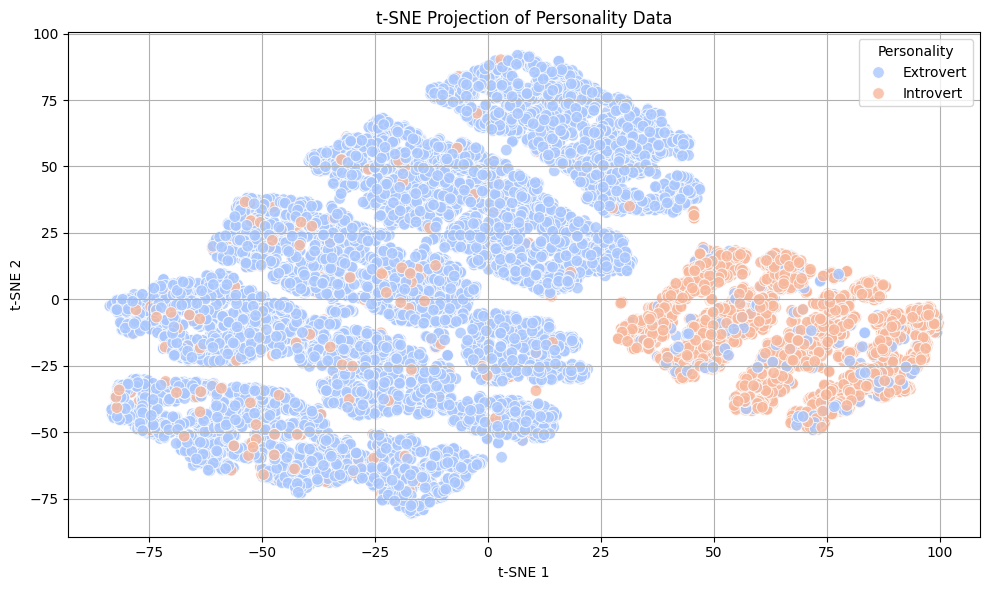

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y.map({0: 'Introvert', 1: 'Extrovert'}), palette='coolwarm', s=70, alpha=0.8)
plt.title('t-SNE Projection of Personality Data')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.tight_layout()
plt.show()


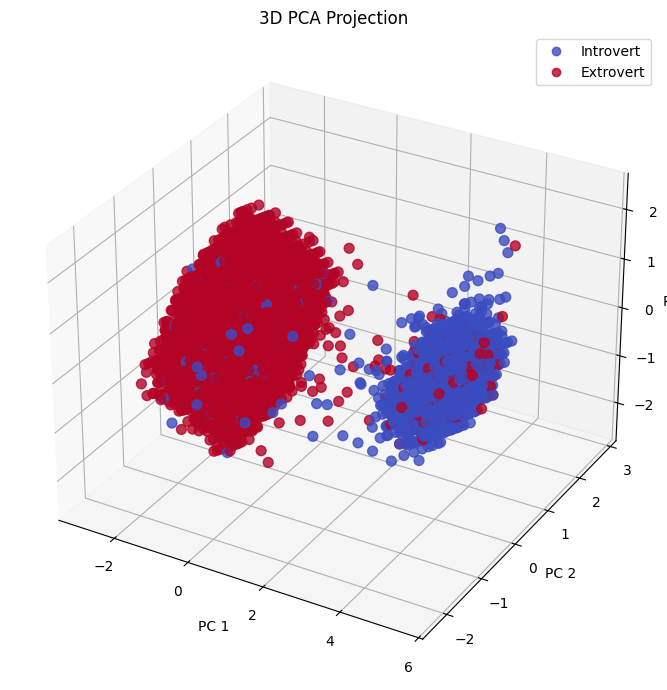

In [16]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                     c=y, cmap='coolwarm', alpha=0.8, s=50)

ax.set_title('3D PCA Projection')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.legend(handles=scatter.legend_elements()[0], labels=['Introvert', 'Extrovert'])
plt.tight_layout()
plt.show()


In [17]:
# Work on data2 for encoding & scaling
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

binary_cols = ['Stage_fear', 'Drained_after_socializing']
numeric_cols = [col for col in data2.columns if col not in binary_cols + ['Personality']]

# Encode binary columns (Yes/No → 1/0)
data2[binary_cols] = data2[binary_cols].replace({'Yes': 1, 'No': 0})

# Impute missing values
num_imputer = SimpleImputer(strategy='median')
bin_imputer = SimpleImputer(strategy='most_frequent')

data2[numeric_cols] = num_imputer.fit_transform(data2[numeric_cols])
data2[binary_cols] = bin_imputer.fit_transform(data2[binary_cols])

# Scale numeric columns
scaler = StandardScaler()
data2[numeric_cols] = scaler.fit_transform(data2[numeric_cols])


/tmp/ipython-input-17-1121445831.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2[binary_cols] = data2[binary_cols].replace({'Yes': 1, 'No': 0})


In [18]:
X = data2.drop(columns=['Personality'])
y = data2['Personality'].map({'Introvert': 0, 'Extrovert': 1})

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

start = time.time()
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
train_time = time.time() - start
print(f"✅ Model trained in {train_time:.4f}s")

✅ Model trained in 0.0187s


In [19]:
val_preds = model.predict(X_val)
val_acc = accuracy_score(y_val, val_preds)
print(f"📊 Validation Accuracy: {val_acc:.6f}")

# Test preprocessing
X_test = test.drop(columns=['id'])
X_test[binary_cols] = X_test[binary_cols].replace({'Yes': 1, 'No': 0})
X_test[numeric_cols] = num_imputer.transform(X_test[numeric_cols])
X_test[binary_cols] = bin_imputer.transform(X_test[binary_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Predictions
preds_test = model.predict(X_test)
preds_labels = ['Introvert' if p == 0 else 'Extrovert' for p in preds_test]

# Submission file
submission = pd.DataFrame({
    'id': test['id'],
    'Personality': preds_labels
})
submission.to_csv('sample_submission.csv', index=False)
print("✅ Predictions saved to sample_submission.csv")

📊 Validation Accuracy: 0.908055
✅ Predictions saved to sample_submission.csv


/tmp/ipython-input-19-2428287377.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test[binary_cols] = X_test[binary_cols].replace({'Yes': 1, 'No': 0})


In [22]:
X = data2.drop(columns=['Personality'])
y = data2['Personality'].map({'Introvert': 0, 'Extrovert': 1})

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

start = time.time()
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Set up GridSearchCV
grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Train with grid search
start = time.time()
grid.fit(X_train, y_train)
train_time = time.time() - start

# Use best estimator
model = grid.best_estimator_
print(f"✅ Best Params: {grid.best_params_}")

train_time = time.time() - start
print(f"✅ Model trained in {train_time:.4f}s")

✅ Best Params: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
✅ Model trained in 10.2815s


In [23]:
val_preds = model.predict(X_val)
val_acc = accuracy_score(y_val, val_preds)
print(f"📊 Validation Accuracy: {val_acc:.6f}")

# Test preprocessing
X_test = test.drop(columns=['id'])
X_test[binary_cols] = X_test[binary_cols].replace({'Yes': 1, 'No': 0})
X_test[numeric_cols] = num_imputer.transform(X_test[numeric_cols])
X_test[binary_cols] = bin_imputer.transform(X_test[binary_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Predictions
preds_test = model.predict(X_test)
preds_labels = ['Introvert' if p == 0 else 'Extrovert' for p in preds_test]

# Submission file
submission = pd.DataFrame({
    'id': test['id'],
    'Personality': preds_labels
})
submission.to_csv('sample_submission.csv', index=False)
print("✅ Predictions saved to sample_submission.csv")

📊 Validation Accuracy: 0.957689
✅ Predictions saved to sample_submission.csv


/tmp/ipython-input-23-2428287377.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test[binary_cols] = X_test[binary_cols].replace({'Yes': 1, 'No': 0})
